In [35]:
import pandas as pd
import numpy


In [2]:
nps_file = '../data/FOIA-FAQ-NPS-Mortality-Data-CY2007-to-CY2023-Released-August-2023.csv'

In [3]:
nps_file = pd.read_csv(nps_file,header=2)
nps_file.head()

,Incident Date,Park Name,Cause of Death,Intent,Outcome,Sex,Age Range
0,1/1/2007,Glen Canyon National Recreation Area,Undetermined,Undetermined,Fatal injury,Male,65+
1,1/22/2007,Golden Gate National Recreation Area,Drowning,Unintentional,Fatal injury,Male,Not Reported
2,1/22/2007,Golden Gate National Recreation Area,Undetermined,Undetermined,Fatal injury,Male,Not Reported
3,1/29/2007,Natchez Trace Parkway,Motor Vehicle Crash,Unintentional,Fatal injury,Female,15-24
4,1/29/2007,Natchez Trace Parkway,Motor Vehicle Crash,Unintentional,Fatal injury,Female,45-54


In [5]:
nps_file.dtypes

Incident Date     object
Park Name         object
Cause of Death    object
Intent            object
Outcome           object
Sex               object
Age Range         object
dtype: object

In [4]:
nps_file[['Month','Day','Year']] = nps_file['Incident Date'].str.split('/',n=2,expand=True)
nps_file.head()

,Incident Date,Park Name,Cause of Death,Intent,Outcome,Sex,Age Range,Month,Day,Year
0,1/1/2007,Glen Canyon National Recreation Area,Undetermined,Undetermined,Fatal injury,Male,65+,1,1,2007
1,1/22/2007,Golden Gate National Recreation Area,Drowning,Unintentional,Fatal injury,Male,Not Reported,1,22,2007
2,1/22/2007,Golden Gate National Recreation Area,Undetermined,Undetermined,Fatal injury,Male,Not Reported,1,22,2007
3,1/29/2007,Natchez Trace Parkway,Motor Vehicle Crash,Unintentional,Fatal injury,Female,15-24,1,29,2007
4,1/29/2007,Natchez Trace Parkway,Motor Vehicle Crash,Unintentional,Fatal injury,Female,45-54,1,29,2007


In [107]:
YellowStone_mortal=nps_file.loc[nps_file['Park Name']=='Yellowstone National Park']
YellowStone_mortal['Year'].unique()

array(['2007', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019', '2021', '2022', '2023'],
      dtype=object)

In [6]:
grouped_df = nps_file.groupby(['Park Name','Year'])['Cause of Death'].count()
sorted_df = grouped_df.sort_values(ascending=False)
sorted_df.to_csv('sorted_values.csv')
sorted_df = pd.read_csv('sorted_values.csv')
count_array = sorted_df['Cause of Death'].to_list()
parks_array = sorted_df['Park Name'].to_list()

parks_array

['Lake Mead National Recreation Area',
 'Grand Canyon National Park',
 'Lake Mead National Recreation Area',
 'Lake Mead National Recreation Area',
 'Yosemite National Park',
 'Lake Mead National Recreation Area',
 'Blue Ridge Parkway',
 'Lake Mead National Recreation Area',
 'Lake Mead National Recreation Area',
 'Natchez Trace Parkway',
 'Blue Ridge Parkway',
 'Yosemite National Park',
 'Grand Canyon National Park',
 'Golden Gate National Recreation Area',
 'Grand Canyon National Park',
 'Lake Mead National Recreation Area',
 'Lake Mead National Recreation Area',
 'Yosemite National Park',
 'Lake Mead National Recreation Area',
 'Lake Mead National Recreation Area',
 'Lake Mead National Recreation Area',
 'Golden Gate National Recreation Area',
 'Sequoia & Kings Canyon National Parks',
 'Natchez Trace Parkway',
 'Lake Mead National Recreation Area',
 'Great Smoky Mountains National Park',
 'Lake Mead National Recreation Area',
 'Yosemite National Park',
 'Denali National Park & Prese

In [8]:
sorted_df.to_csv('\\Users\\larry\\OneDrive\\Desktop\\vbu_proj_3\\Project_3_Data_Visualization\\File_Cleaning_data_extraction\\sorted_values.csv')

In [9]:
sorted_df.head()

,Park Name,Year,Cause of Death
0,Lake Mead National Recreation Area,2021,26
1,Grand Canyon National Park,2014,26
2,Lake Mead National Recreation Area,2017,26
3,Lake Mead National Recreation Area,2022,24
4,Yosemite National Park,2017,22


In [11]:
sorted_df.dtypes

Park Name         object
Year               int64
Cause of Death     int64
dtype: object

In [81]:
visitation_data_df = pd.read_csv("../Annual-Visits-07-23.csv")

visitation_data_df.head()

,Park Name,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,Average
0,Blue Ridge PKWY,"17,352,286","16,309,307","15,936,316","14,517,118","15,382,447","15,205,059","12,877,368","13,941,749","15,054,603","15,175,578","16,093,765","14,690,418","14,976,085","14,099,485","15,948,148","15,711,004","16,757,635","15,295,787"
1,Golden Gate NRA,"14,397,313","14,554,750","15,036,372","14,271,503","14,567,487","14,540,338","14,289,121","15,004,420","14,888,537","15,638,777","14,981,897","15,223,697","15,002,227","12,400,045","13,712,614","15,638,911","14,953,882","14,653,052"
2,Great Smoky Mountains NP,"9,372,253","9,044,010","9,491,437","9,463,538","9,008,830","9,685,829","9,354,695","10,099,276","10,712,674","11,312,786","11,338,893","11,421,200","12,547,743","12,095,720","14,161,548","12,937,633","13,297,647","10,902,689"
3,Gateway NRA,"8,813,204","9,431,021","9,010,522","8,820,757","7,697,727","5,043,863","6,191,246","6,021,713","6,392,565","8,651,770","9,190,610","9,243,305","9,405,622","8,404,728","9,060,807","8,728,291","8,705,329","8,165,475"
4,George Washington MEM PKWY,"6,837,139","7,009,630","6,938,309","6,925,099","7,417,397","7,425,577","7,360,392","7,472,150","7,286,463","10,323,339","7,562,793","7,288,623","7,487,265","6,237,361","6,821,179","7,397,120","7,391,260","7,363,594"


In [84]:
visitation_data_df['Park Name']= visitation_data_df['Park Name'].replace('NRA','National Recreation Area',regex=True)
visitation_data_df['Park Name']= visitation_data_df['Park Name'].replace('PKWY','Parkway',regex=True)
visitation_data_df['Park Name']= visitation_data_df['Park Name'].replace('NP','National Park',regex=True)

visitation_data_df.head()

,Park Name,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,Average
0,Blue Ridge Parkway,"17,352,286","16,309,307","15,936,316","14,517,118","15,382,447","15,205,059","12,877,368","13,941,749","15,054,603","15,175,578","16,093,765","14,690,418","14,976,085","14,099,485","15,948,148","15,711,004","16,757,635","15,295,787"
1,Golden Gate National Recreation Area,"14,397,313","14,554,750","15,036,372","14,271,503","14,567,487","14,540,338","14,289,121","15,004,420","14,888,537","15,638,777","14,981,897","15,223,697","15,002,227","12,400,045","13,712,614","15,638,911","14,953,882","14,653,052"
2,Great Smoky Mountains National Park,"9,372,253","9,044,010","9,491,437","9,463,538","9,008,830","9,685,829","9,354,695","10,099,276","10,712,674","11,312,786","11,338,893","11,421,200","12,547,743","12,095,720","14,161,548","12,937,633","13,297,647","10,902,689"
3,Gateway National Recreation Area,"8,813,204","9,431,021","9,010,522","8,820,757","7,697,727","5,043,863","6,191,246","6,021,713","6,392,565","8,651,770","9,190,610","9,243,305","9,405,622","8,404,728","9,060,807","8,728,291","8,705,329","8,165,475"
4,George Washington MEM Parkway,"6,837,139","7,009,630","6,938,309","6,925,099","7,417,397","7,425,577","7,360,392","7,472,150","7,286,463","10,323,339","7,562,793","7,288,623","7,487,265","6,237,361","6,821,179","7,397,120","7,391,260","7,363,594"


In [85]:
# visitation_deaths_per_capita = pd.to_numeric(visitation_data_df['2007'])
visitation_deaths_per_capita = pd.merge(sorted_df ,visitation_data_df, how="inner", on=["Park Name"])

visitation_deaths_per_capita.head()

,Park Name,Year,Cause of Death,2007,2008,2009,2010,2011,2012,2013,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Average
0,Lake Mead National Recreation Area,2021,26,"7,622,139","7,601,863","7,668,689","7,080,758","6,396,682","6,285,439","6,344,714",...,"7,298,465","7,175,891","7,882,339","7,578,958","7,499,049","8,016,510","7,603,474","5,578,226","5,798,541","7,080,859"
1,Lake Mead National Recreation Area,2017,26,"7,622,139","7,601,863","7,668,689","7,080,758","6,396,682","6,285,439","6,344,714",...,"7,298,465","7,175,891","7,882,339","7,578,958","7,499,049","8,016,510","7,603,474","5,578,226","5,798,541","7,080,859"
2,Lake Mead National Recreation Area,2022,24,"7,622,139","7,601,863","7,668,689","7,080,758","6,396,682","6,285,439","6,344,714",...,"7,298,465","7,175,891","7,882,339","7,578,958","7,499,049","8,016,510","7,603,474","5,578,226","5,798,541","7,080,859"
3,Lake Mead National Recreation Area,2010,22,"7,622,139","7,601,863","7,668,689","7,080,758","6,396,682","6,285,439","6,344,714",...,"7,298,465","7,175,891","7,882,339","7,578,958","7,499,049","8,016,510","7,603,474","5,578,226","5,798,541","7,080,859"
4,Lake Mead National Recreation Area,2014,21,"7,622,139","7,601,863","7,668,689","7,080,758","6,396,682","6,285,439","6,344,714",...,"7,298,465","7,175,891","7,882,339","7,578,958","7,499,049","8,016,510","7,603,474","5,578,226","5,798,541","7,080,859"


In [86]:
name_list=[]
year_list=[]
visit_list=[]
death_list=[]
for index,row in visitation_deaths_per_capita.iterrows():
    
    name_list.append(row['Park Name'])
    year_value=row['Year']
    year_list.append(year_value)
    visit_list.append((row[str(year_value)].replace(',','')))
    death_list.append(row['Cause of Death'])
dict={
        'Park Name':name_list,
        'Year':year_list,
        "Visitors":visit_list,
        'Num of Deaths':death_list
    }
df=pd.DataFrame(dict)
df.head()

,Park Name,Year,Visitors,Num of Deaths
0,Lake Mead National Recreation Area,2021,7603474,26
1,Lake Mead National Recreation Area,2017,7882339,26
2,Lake Mead National Recreation Area,2022,5578226,24
3,Lake Mead National Recreation Area,2010,7080758,22
4,Lake Mead National Recreation Area,2014,6942873,21


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Park Name      21 non-null     object 
 1   Year           21 non-null     int64  
 2   Visitors       21 non-null     int64  
 3   Num of Deaths  21 non-null     int64  
 4   Per Capita     21 non-null     float64
dtypes: float64(1), int64(3), object(1)
memory usage: 968.0+ bytes


In [87]:
df['Visitors']=pd.to_numeric(df['Visitors'])

In [95]:
df['Per Capita']=df['Num of Deaths']/df['Visitors']*1000000
df.head()

,Park Name,Year,Visitors,Num of Deaths,Per Capita
0,Lake Mead National Recreation Area,2021,7603474,26,3.419490
1,Lake Mead National Recreation Area,2017,7882339,26,3.298513
2,Lake Mead National Recreation Area,2022,5578226,24,4.302443
3,Lake Mead National Recreation Area,2010,7080758,22,3.107012
4,Lake Mead National Recreation Area,2014,6942873,21,3.024684


In [98]:
lake_mead=df.loc[df['Park Name']=='Lake Mead National Recreation Area']
north_cascades=df.loc[df['Park Name']=='North Cascades National Park']
blue_Ridge=df.loc[df['Park Name']=='Blue Ridge Parkway']
YellowStone=df.loc[df['Park Name']=='Yellowstone National Park']
Yosemite=df.loc[df['Park Name']=='Yosemite National Park']

In [105]:
lake_mead=lake_mead.sort_values(['Year'])
north_cascades=north_cascades.sort_values(['Year'])
blue_Ridge=YellowStone.sort_values(['Year'])
YellowStone=YellowStone.sort_values(['Year'])
Yosemite=Yosemite.sort_values(['Year'])

In [112]:
mead_list=Yosemite['Per Capita'].to_list()
mead_list

[1.7126083367490355,
 0.5828331168108305,
 2.4080447960546594,
 1.537906314848383,
 3.796129618086584,
 2.3355973056549484,
 1.3545763413489034,
 2.8331223944932344,
 4.819025125674151,
 2.9827786293058396,
 5.072759512000535,
 4.738821120975619,
 3.391469910539807,
 1.8250423181687525,
 2.1812926885795694,
 1.2830151883337995]

In [104]:
YellowStone['Year'].unique()

array([2007, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
       2019, 2021, 2022, 2023], dtype=int64)

In [106]:
lake_mead['Year'].unique()

array([2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
       2018, 2019, 2020, 2021, 2022, 2023], dtype=int64)

In [103]:
YellowStone=YellowStone.sort_values(['Year'])
YellowStone.head()

,Park Name,Year,Visitors,Num of Deaths,Per Capita
154,Yellowstone National Park,2007,3151343,6,1.903950
160,Yellowstone National Park,2009,3295187,1,0.303473
152,Yellowstone National Park,2010,3640185,7,1.922979
159,Yellowstone National Park,2011,3394326,2,0.589219
158,Yellowstone National Park,2012,3447729,2,0.580092


In [90]:
visit_df=df.groupby(['Park Name'])['Visitors'].mean().sort_values(ascending=False)
visit_df.head()

Park Name
Blue Ridge Parkway                      1.537056e+07
Golden Gate National Recreation Area    1.465305e+07
Great Smoky Mountains National Park     1.090269e+07
Gateway National Recreation Area        8.404766e+06
Lake Mead National Recreation Area      7.080859e+06
Name: Visitors, dtype: float64

In [91]:
new_df=df.groupby(['Park Name'])['Per Capita'].mean().sort_values(ascending=False)
new_df.head()

Park Name
North Cascades National Park             0.000080
Isle Royale National Park                0.000050
Dry Tortugas National Park               0.000018
Gauley River National Recreation Area    0.000013
Congaree National Park                   0.000011
Name: Per Capita, dtype: float64

In [15]:
# Combine deaths for each park by summing up the deaths
aggregated_deaths_df = sorted_df.groupby('Park Name')['Cause of Death'].sum().reset_index()

# Sort the DataFrame by total deaths in descending order
sorted_deaths_df = aggregated_deaths_df.sort_values(by='Cause of Death', ascending=False)

# Select the park with the most deaths
park_with_most_deaths = sorted_deaths_df.head(5)

print("Park with the Most Deaths:")
print(park_with_most_deaths)

Park with the Most Deaths:
                                Park Name  Cause of Death
116    Lake Mead National Recreation Area             304
87             Grand Canyon National Park             185
197                Yosemite National Park             173
138                 Natchez Trace Parkway             150
84   Golden Gate National Recreation Area             142


In [16]:
aggregated_deaths_df.dtypes

Park Name         object
Cause of Death     int64
dtype: object

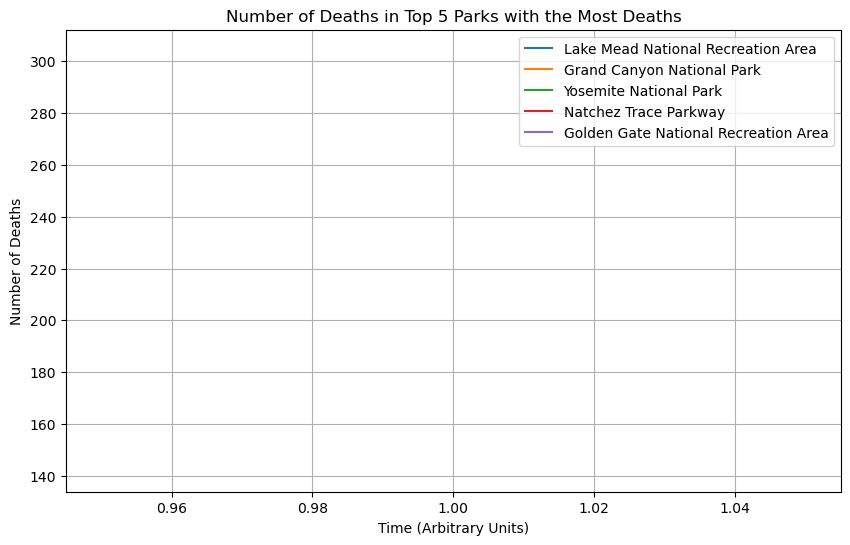

In [17]:
import matplotlib.pyplot as plt

# Create a line graph
plt.figure(figsize=(10, 6))
for park in park_with_most_deaths['Park Name']:
    park_data = sorted_deaths_df[sorted_deaths_df['Park Name'] == park]
    plt.plot(range(1, len(park_data) + 1), park_data['Cause of Death'], label=park)

plt.title('Number of Deaths in Top 5 Parks with the Most Deaths')
plt.xlabel('Time (Arbitrary Units)')
plt.ylabel('Number of Deaths')
plt.legend()
plt.grid(True)
plt.show()